In [53]:
import requests
from urllib import request
from shutil import copyfileobj
import pandas as pd
import urllib3
from bs4 import BeautifulSoup
import numpy as np
from projet_final_function import *
import matplotlib.pyplot as plt

In [54]:
url = "https://www.vendeeglobe.org/fr/classement/20210305_080000"
url_base = "https://www.vendeeglobe.org/fr/classement/"
file_base = "vendeeglobe_"

In [55]:
soup = BeautifulSoup(requests.get(url).content)
list_classement = []

In [56]:
hist_class_soup = soup.find_all('option')
for i in hist_class_soup[1:]:
    class_=i.text.replace('-',"").replace(":","")[1:].replace(" ","_")
    list_classement.append(class_)


In [57]:
prem_classement = "vendeeglobe_20201108_210000"
der_class = "vendeeglobe_20210305_040000"

In [44]:
url_base = "https://www.vendeeglobe.org/download-race-data/"
data_path = "/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/"

df_all = pd.DataFrame()

for i in list_classement:
    file_class_name = file_base + i + ".xlsx"
    url_class = url_base + file_class_name

    response = requests.get(url_class)
    open(file_class_name, "wb").write(response.content)


    with xw.Book(data_path+file_class_name, mode="r") as book:
        sheet1 = book.sheets[0]
        data = sheet1.cells.value
        df = pd.DataFrame(data).drop(0).replace('\r', '', regex=True).reset_index().drop('index', axis=1)
        df.to_csv(data_path+file_base+i)


In [58]:
list_classement

['20210305_080000',
 '20210305_040000',
 '20210304_210000',
 '20210304_170000',
 '20210304_140000',
 '20210304_110000',
 '20210304_080000',
 '20210304_040000',
 '20210303_210000',
 '20210303_170000',
 '20210303_140000',
 '20210303_110000',
 '20210303_080000',
 '20210303_040000',
 '20210302_210000',
 '20210302_170000',
 '20210302_140000',
 '20210302_110000',
 '20210302_080000',
 '20210302_040000',
 '20210301_210000',
 '20210301_170000',
 '20210301_140000',
 '20210301_110000',
 '20210301_080000',
 '20210301_040000',
 '20210228_210000',
 '20210228_170000',
 '20210228_140000',
 '20210228_110000',
 '20210228_080000',
 '20210228_040000',
 '20210227_210000',
 '20210227_170000',
 '20210227_140000',
 '20210227_110000',
 '20210227_080000',
 '20210227_040000',
 '20210226_210000',
 '20210226_170000',
 '20210226_140000',
 '20210226_110000',
 '20210226_080000',
 '20210226_040000',
 '20210225_210000',
 '20210225_170000',
 '20210225_140000',
 '20210225_110000',
 '20210225_080000',
 '20210225_040000',


In [69]:
j=0
for i in list_classement[1:-5]:
    try:
        if j==0:
            df_0=extract_inrace(file_base+i,"/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/")
            df_all = prep_df_(df_0)
        else:
            df=extract_inrace(file_base+i,"/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/")
            
            df=prep_df_(df)
            
            df_all=df_all.append(df)
            print(df_all)
            print(j)
    except:
        print(i)
    j=j+1



/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

   Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0    25  04:30 FR  46.722500   2.442222                      128   
0    25  21:30 FR  47.145556   3.825000                      107   

   Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                         11.4                     11.3   
0                          8.7                      8.6   

   Depuis 30 minutes - Distance  Depuis le dernier classement - Cap  \
0                           1.0                                 115   
0                           4.4                                  94   

   Depuis le dernier classement - Vitesse  ...  Depuis 24 heures - Vitesse  \
0                                     8.9  ...                         6.7   
0                                     9.1  ...                         7.1   

   Depuis 24 heures - VMG  Depuis 24 heures - Distance   DTF  DTL  \
0                     6.7                        161.5  30.6  0.0   
0                     6.9     

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

   Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0    25  04:30 FR  46.722500   2.442222                      128   
0    25  21:30 FR  47.145556   3.825000                      107   
0    25  17:30 FR  47.192500   4.710000                       94   
0    25  14:30 FR  47.222778   5.352500                      106   
0    25  11:30 FR  47.153056   5.586389                       19   
0    25  08:30 FR  46.819167   5.850278                       26   
0    25  04:30 FR  46.388056   6.325000                       56   
0    25  21:30 FR  45.996667   7.605278                       54   
0    25  17:30 FR  45.800833   8.351111                       78   
0    25  14:30 FR  45.764444   9.119167                       85   
0    25  11:30 FR  45.723889   9.860000                       86   
0    25  08:30 FR  45.716944  10.645833                       81   
0    25  04:30 FR  45.576389  11.691111                       82   
0    25  21:30 FR  45.435556  13.467222         

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

   Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0    25  04:30 FR  46.722500   2.442222                      128   
0    25  21:30 FR  47.145556   3.825000                      107   
0    25  17:30 FR  47.192500   4.710000                       94   
0    25  14:30 FR  47.222778   5.352500                      106   
0    25  11:30 FR  47.153056   5.586389                       19   
0    25  08:30 FR  46.819167   5.850278                       26   
0    25  04:30 FR  46.388056   6.325000                       56   
0    25  21:30 FR  45.996667   7.605278                       54   
0    25  17:30 FR  45.800833   8.351111                       78   
0    25  14:30 FR  45.764444   9.119167                       85   
0    25  11:30 FR  45.723889   9.860000                       86   
0    25  08:30 FR  45.716944  10.645833                       81   
0    25  04:30 FR  45.576389  11.691111                       82   
0    25  21:30 FR  45.435556  13.467222         

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
1     25  17:30 FR  26.080833  37.245000                       78   
0     24  14:30 FR  36.284167  23.898889                       70   
1     25  14:30 FR  25.968611  37.566111                       55   
0     24  11:30 FR  36.130556  24.492222                       76   
1     25  11:30 FR  25.750833  37.788611                       34   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
1     24  14:30 FR  25.065556  36.671389                      338   
2     25  14:30 FR  18.087778  34.764167                      340   
0     23  11:30 FR  42.513333  10.886111                        5   
1     24  11:30 FR  24.809722  36.626944                       10   
2     25  11:30 FR  17.616667  34.613611                      342   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
0     21  11:30 FR  41.485833  13.593056                       63   
1     22  11:30 FR  36.155000  18.258333                       60   
2     23  11:30 FR  34.625833  27.647778                       62   
3     24  11:30 FR   9.613889  34.835278                      340   
4     25  11:30 FR   5.230556  28.919167                      344   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
6     21  14:30 FR  30.291389  29.930000                       14   
7     22  14:30 FR  28.675278  33.488333                       21   
8     23  14:30 FR  27.311667  37.961944                       19   
9     24  14:30 FR   6.102778  32.607500                        3   
10    25  14:30 FR   9.160278  28.384722                        4   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
6     21  21:30 FR  18.451111  34.887778                        9   
7     22  21:30 FR  19.106667  37.547500                      319   
8     23  21:30 FR  15.355000  33.507222                        2   
9     24  21:30 FR  20.374167  32.624167                      322   
10    25  21:30 FR  22.983333  26.977222                      335   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
9     21  11:30 FR   3.972500  31.885000                      345   
10    22  11:30 FR   4.269167  32.899444                      333   
11    23  11:30 FR   2.966667  30.083889                      356   
12    24  11:30 FR  29.410833  30.268611                      310   
13    25  11:30 FR  30.495000  30.167222                       57   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
10    21  04:30 FR   7.581667  31.036944                      345   
11    22  04:30 FR  11.074444  29.909444                      357   
12    23  04:30 FR  11.692500  31.696389                      353   
13    24  04:30 FR  38.040556  40.363333                       68   
14    25  04:30 FR  39.819722  38.070833                       36   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
20    21  14:30 FR  24.011667  26.806389                      347   
21    22  14:30 FR  26.187778  26.041944                      348   
22    23  14:30 FR  26.001944  29.507500                        7   
23    24  14:30 FR  48.151389  53.862500                       25   
24    25  14:30 FR  49.383611  52.491389                       44   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
20    21  08:30 FR  34.221944  26.005278                       31   
21    22  08:30 FR  35.817778  28.362500                       16   
22    23  08:30 FR  36.296389  27.115556                       16   
23    24  08:30 FR  56.068333  71.135000                       93   
24    25  08:30 FR  56.059722  73.426667                       96   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
20    21  21:30 FR  45.454722   40.555833                       79   
21    22  21:30 FR  47.706667   49.040000                       54   
22    23  21:30 FR  49.018333   50.472500                       57   
23    24  21:30 FR  54.866111   98.121389                       97   
24    25  21:30 FR  51.742500  101.895278                      121   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
20    21  14:30 FR  52.198333   58.277778                       28   
21    22  14:30 FR  55.557778   66.236111                       26   
22    23  14:30 FR  56.066111   66.841389                      132   
23    24  14:30 FR  52.823889  121.160278                      122   
24    25  14:30 FR  50.454167  125.037778                      119   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
21    22  04:30 FR  54.048611  102.862500                      117   
22    23  04:30 FR  53.763889  103.540278                      109   
23    24  04:30 FR  48.090833  142.037500                      114   
24    25  04:30 FR  43.455833  147.102500                      112   
25    26  04:30 FR  51.370000  166.864444                      120   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
21    22  21:30 FR  52.343333  129.930556                       79   
22    23  21:30 FR  51.746111  130.606111                       79   
23    24  21:30 FR  52.638889  162.638611                       75   
24    25  21:30 FR  45.927222  167.635278                       52   
25    26  21:30 FR  50.820556  152.455833                      110   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
22    23  17:30 FR  51.621389  151.930000                       33   
23    24  17:30 FR  51.868611  153.103889                       64   
24    25  17:30 FR  53.977222  181.132222                       34   
25    26  17:30 FR  50.206944  177.361389                       79   
26    27  17:30 FR  49.777778  130.516667                       32   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
22    23  11:30 FR  54.980000  176.546389                       96   
23    24  11:30 FR  55.405833  178.783611                       87   
24    25  11:30 FR  53.022778  158.901944                      143   
25    26  11:30 FR  50.603889  154.753889                      143   
26    27  11:30 FR  44.053056  117.367222                      134   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
22    23  08:30 FR  54.465000  161.833333                      127   
23    24  08:30 FR  55.085833  158.915833                      118   
24    25  08:30 FR  49.750833  139.863611                      115   
25    26  08:30 FR  49.040000  134.341389                      111   
26    27  08:30 FR  42.653333  107.468333                      134   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
22    23  08:30 FR  47.793889  140.418611                      122   
23    24  08:30 FR  47.687778  135.916389                      128   
24    25  08:30 FR  46.859167  124.503889                      104   
25    26  08:30 FR  45.189167  119.208889                      114   
26    27  08:30 FR  41.673056   99.539444                       31   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude   Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500    2.442222                      128   
0     25  21:30 FR  47.145556    3.825000                      107   
0     25  17:30 FR  47.192500    4.710000                       94   
0     25  14:30 FR  47.222778    5.352500                      106   
0     25  11:30 FR  47.153056    5.586389                       19   
..   ...       ...        ...         ...                      ...   
22    23  21:30 FR  45.785278  114.050833                       78   
23    24  21:30 FR  44.979167  112.054167                       99   
24    25  21:30 FR  43.538889  105.460556                      339   
25    26  21:30 FR  45.193333   97.923056                      106   
26    27  21:30 FR  41.115556   82.619167                       78   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7        

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
22    23  17:30 FR  45.302500  89.041944                      130   
23    24  17:30 FR  48.155556  87.343333                      135   
24    25  17:30 FR  46.651111  86.565278                      109   
25    26  17:30 FR  44.855833  77.619167                       84   
26    27  17:30 FR  41.843056  66.379167                       94   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
22    23  17:30 FR  43.389444  71.625556                      102   
23    24  17:30 FR  43.202222  70.972500                       90   
24    25  17:30 FR  43.210000  70.284167                       93   
25    26  17:30 FR  42.441667  59.938056                      108   
26    27  17:30 FR  40.596944  54.405833                       92   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
22    23  14:30 FR  40.377500  50.483889                       92   
23    24  14:30 FR  40.591667  49.115278                       91   
24    25  14:30 FR  40.762778  48.793333                      109   
25    26  14:30 FR  42.247222  45.149167                       49   
26    27  14:30 FR  42.335556  41.789722                       68   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
22    23  17:30 FR  43.036389  32.956944                      101   
23    24  17:30 FR  43.514444  32.256389                       96   
24    25  17:30 FR  42.616944  30.925000                      109   
25    26  17:30 FR  42.678056  28.712222                       99   
26    27  17:30 FR  41.208056  25.707778                      142   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
23    24  17:30 FR  41.606667  13.488611                       62   
24    25  17:30 FR  42.182778  12.534722                       78   
25    26  17:30 FR  42.606944   8.951944                       87   
26    27  17:30 FR  40.432500   7.934444                       99   
27    28  17:30 FR  39.051667   7.134444                      101   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
23    24  17:30 FR  41.085000   6.106111                      169   
24    25  17:30 FR  37.821667   7.162222                      124   
25    26  17:30 FR  41.743611  10.450000                      161   
26    27  17:30 FR  40.240278  11.951389                      152   
27    28  17:30 FR  41.602778  16.756944                      153   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
25    26  14:30 FR  33.023889  21.538056                      204   
26    27  14:30 FR  32.209444  22.591111                      120   
27    28  14:30 FR  32.581667  23.357222                      117   
28    29  14:30 FR  31.354167  24.576389                      125   
29    30  14:30 FR  27.480556  28.308889                      139   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
26    27  11:30 FR  24.960278  31.905000                      165   
27    28  11:30 FR  22.071944  32.276389                      168   
28    29  11:30 FR  22.155833  33.815278                      171   
29    30  11:30 FR  20.411944  33.591944                      185   
30    31  11:30 FR  12.656667  33.487778                      184   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
27    28  11:30 FR  11.614722  33.578889                      187   
28    29  11:30 FR   8.626667  32.663333                      190   
29    30  11:30 FR   8.039167  32.050556                      182   
30    31  11:30 FR   4.946389  31.336111                      188   
31    32  11:30 FR   3.634722  27.733611                      211   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
27    28  11:30 FR   2.696944  28.364167                      198   
28    29  11:30 FR   3.500000  28.422778                      226   
29    30  11:30 FR   4.052222  28.713889                      146   
30    31  11:30 FR   6.755833  29.045833                      173   
31    32  11:30 FR  14.384722  23.302500                      275   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
27    28  11:30 FR   9.852778  27.571667                      179   
28    29  11:30 FR   9.645833  29.140000                      180   
29    30  11:30 FR   9.874722  27.951111                      168   
30    31  11:30 FR  14.440000  29.141389                      187   
31    32  11:30 FR  26.580000  19.596667                      180   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
27    28  14:30 FR  21.140278  26.069167                      194   
28    29  14:30 FR  21.516944  25.451667                      199   
29    30  14:30 FR  22.368056  25.736667                      199   
30    31  14:30 FR  24.301944  27.396944                      202   
31    32  14:30 FR  42.973889  13.752500                      191   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
28    29  14:30 FR  30.574444  21.300000                      240   
29    30  14:30 FR  31.511944  20.181389                      175   
30    31  14:30 FR  31.586389  20.534167                      221   
31    32  14:30 FR  34.986667  18.579167                      214   
32    33  14:30 FR  46.503056   1.795833                      126   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
28    29  15:30 FR  38.851667  19.840000                      209   
29    30  15:30 FR  38.784167  18.868333                      161   
30    31  15:30 FR  40.802222  17.901111                      172   
31    32  15:30 FR  42.346389  10.219444                      230   
32    33  15:30 FR  45.627778   6.113056                       96   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x1

    Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
28    29  15:30 FR  43.863611   9.054444                      258   
29    30  15:30 FR  44.693056  11.565556                      254   
30    31  15:30 FR  44.524722  10.488611                      254   
31    32  15:30 FR  44.461944  10.106944                      249   
32    33  15:30 FR  46.503611   1.795000                      199   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                    

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_69635/305462654.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df)


In [70]:
df_all

Rang  Heure FR   Latitude  Longitude  Depuis 30 minutes - Cap  \
0     25  04:30 FR  46.722500   2.442222                      128   
0     25  21:30 FR  47.145556   3.825000                      107   
0     25  17:30 FR  47.192500   4.710000                       94   
0     25  14:30 FR  47.222778   5.352500                      106   
0     25  11:30 FR  47.153056   5.586389                       19   
..   ...       ...        ...        ...                      ...   
28    29  05:30 FR  46.280833   5.621111                      268   
29    30  05:30 FR  45.931111   4.928333                      280   
30    31  05:30 FR  45.867222   4.825556                      281   
31    32  05:30 FR  46.395278   5.540000                      269   
32    33  05:30 FR  46.492222   1.789167                      215   

    Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                          11.4                     11.3   
0                           8.7                      8.6   
0                          10.0                      9.7   
0                           6.7                      6.7   
0                           5.7                      0.5   
..                          ...                      ...   
28                         11.5                      7.8   
29                          9.0                      5.7   
30                          8.1                      5.2   
31                         11.8                      7.8   
32                          0.0                      0.0   

    Depuis 30 minutes - Distance  Depuis le dernier classement - Cap  \
0                            1.0                                 115   
0                            4.4                                  94   
0                            5.0                                  94   
0                            3.4                                  69   
0                            2.8                                  28   
..                           ...                                 ...   
28                           5.8                                 270   
29                           4.5                                 267   
30                           4.0                                 270   
31                           5.9                                 282   
32                           0.0                                  87   

    Depuis le dernier classement - Vitesse  ...  Depuis 24 heures - Vitesse  \
0                                      8.9  ...                         6.7   
0                                      9.1  ...                         7.1   
0                                      8.7  ...                         7.2   
0                                      3.5  ...                         7.4   
0                                      7.6  ...                         8.2   
..                                     ...  ...                         ...   
28                                     9.8  ...                         7.5   
29                                     6.9  ...                         5.7   
30                                     6.3  ...                         5.6   
31                                     9.8  ...                         6.6   
32                                     4.2  ...                         0.0   

    Depuis 24 heures - VMG  Depuis 24 heures - Distance      DTF    DTL  \
0                      6.7                        161.5     30.6    0.0   
0                      6.9                        170.9     92.7    0.0   
0                      6.9                        172.2    127.4    0.0   
0                      7.1                        178.8    152.8    0.0   
0                      7.9                        196.5    161.4    0.0   
..                     ...                          ...      ...    ...   
28                     6.9                        158.9  24166.2   33.2   
29                     5.6              

In [47]:
inf_voil = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/infos_voiliers')
df_complet = pd.merge(df_all, inf_voil, on = 'Skipper')

In [124]:
df_complet.to_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/dataset_complet')

In [48]:
#df_complet = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/dataset_complet').drop('Unnamed: 0.1', axis=1)
df_complet

Rang  Heure FR  Latitude  Longitude  Depuis 30 minutes - Cap  \
0    25  04:30 FR   46.7225   2.442222                      128   

   Depuis 30 minutes - Vitesse  Depuis 30 minutes - VMG  \
0                         11.4                     11.3   

   Depuis 30 minutes - Distance  Depuis le dernier classement - Cap  \
0                           1.0                                 115   

   Depuis le dernier classement - Vitesse  ...  Date de lancement  Longueur  \
0                                     8.9  ...       06 Août 2007     18.28   

   Largeur  Tirant d'eau  Déplacement (poids)  Nombre de dérives  Hauteur mât  \
0      5.8           4.5                  8.5                  2         28.0   

   Voile quille Surface de voiles au près Surface de voiles au portant  
0         acier                       270                          580  

[1 rows x 38 columns]

In [21]:
test=df_complet.loc[df_complet['Skipper']== 'Alex Thomson']

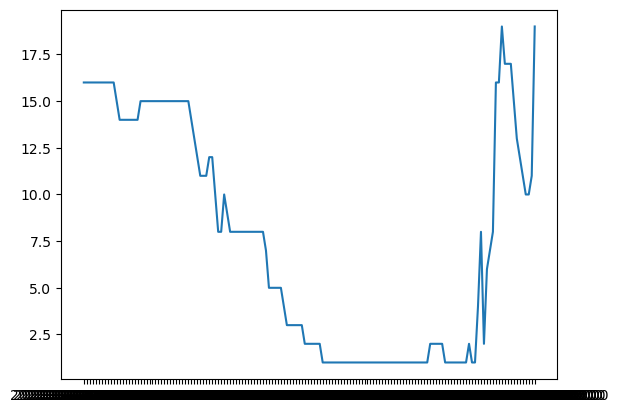

In [22]:
plt.plot(test['Date'],test['Rang'])

Calcul de la corrélation:

In [23]:
df_complet.groupby('Skipper')['Rang'].mean()

Skipper
Alex Thomson             7.519737
Alexia Barrier          24.787743
Ari Huusela             25.927143
Armel Tripon            16.096647
Arnaud Boissieres       17.426056
Benjamin Dutreux         7.436735
Boris Herrmann           6.946281
Charlie Dalin            2.278586
Clarisse Cremer         13.444444
Clement Giraud          24.290970
Damien Seguin            6.292784
Didac Costa             19.922813
Fabrice Amedeo          27.122449
Giancarlo Pedote        10.367010
Isabelle Joschke        11.416000
Jean Le Cam              5.562628
Jeremie Beyou           21.572491
Kevin Escoffier          5.661654
Kojiro Shiraishi        22.126316
Louis Burton             6.813278
Manuel Cousin           21.281804
Maxime Sorel            10.640404
Miranda Merron          23.495066
Nicolas Troussel         7.152174
Pip Hare                19.184991
Romain Attanasio        13.374074
Sebastien Destremau     27.894231
Sebastien Simon         10.298701
Stephane Le Diraison    17.823427
Thomas

In [24]:
df_complet.groupby('Skipper')['Depuis 30 minutes - Distance'].mean()

Skipper
Alex Thomson            7.038158
Alexia Barrier          5.286547
Ari Huusela             5.181714
Armel Tripon            6.913807
Arnaud Boissieres       6.263028
Benjamin Dutreux        7.317347
Boris Herrmann          7.328306
Charlie Dalin           7.549064
Clarisse Cremer         6.654598
Clement Giraud          5.930936
Damien Seguin           7.095258
Didac Costa             6.035334
Fabrice Amedeo          5.494898
Giancarlo Pedote        7.384742
Isabelle Joschke        7.058933
Jean Le Cam             6.985010
Jeremie Beyou           6.864312
Kevin Escoffier         7.308271
Kojiro Shiraishi        6.378947
Louis Burton            7.431535
Manuel Cousin           5.897101
Maxime Sorel            6.868889
Miranda Merron          5.716118
Nicolas Troussel        6.336957
Pip Hare                6.091274
Romain Attanasio        6.359259
Sebastien Destremau     4.868029
Sebastien Simon         7.078571
Stephane Le Diraison    6.250874
Thomas Ruyant           7.694617
Ya

In [25]:
np.corrcoef(df_complet.groupby('Skipper')['Rang'].mean().values, df_complet.groupby('Skipper')['Depuis 30 minutes - Distance'].mean().values)

array([[ 1.        , -0.89796208],
       [-0.89796208,  1.        ]])

Affichage le parcours des skippers lors de la course

In [28]:
alex_thompson=df_complet.loc[df_complet['Skipper']== 'Maxime Sorel'].sort_values('Date')
geo_p_alex_thompson = alex_thompson[['Latitude', 'Longitude', 'Date']]

In [29]:
geo_p_alex_thompson

Latitude  Longitude                 Date
8663  45.919722   6.245278  2020-11-09 04:00:00
8662  45.904444   7.084167  2020-11-09 08:00:00
8661  45.903333   7.601667  2020-11-09 11:00:00
8660  45.458611   7.812222  2020-11-09 14:00:00
8659  45.010556   8.207500  2020-11-09 17:00:00
...         ...        ...                  ...
8173  45.790556   9.421667  2021-01-29 08:00:00
8172  45.821667   8.299167  2021-01-29 11:00:00
8171  45.885000   7.261944  2021-01-29 14:00:00
8170  46.124722   6.232778  2021-01-29 17:00:00
8169  46.256667   4.475278  2021-01-29 21:00:00

[495 rows x 3 columns]

In [11]:
from ipyleaflet import Map
# villes

# satellite map
from datetime import datetime, timedelta
from ipyleaflet import basemaps, basemap_to_tiles

import pandas as pd
from ipyleaflet import Marker, LayerGroup

In [12]:
watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

df2 = geo_p_alex_thompson
layers = []
for i, row in df2.iterrows():
    print(row)
    marker = Marker(location=(row['Latitude'], row['Longitude']),
                    draggable=False,
                    title=row['Date'])
    layers.append(marker)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

Latitude               46.490833
Longitude               6.891389
Date         2020-11-09 04:00:00
Name: 14315, dtype: object
Latitude               46.540556
Longitude               7.723889
Date         2020-11-09 08:00:00
Name: 14314, dtype: object
Latitude               46.386389
Longitude               8.125278
Date         2020-11-09 11:00:00
Name: 14313, dtype: object
Latitude                  45.985
Longitude               8.354444
Date         2020-11-09 14:00:00
Name: 14312, dtype: object
Latitude               45.549444
Longitude               8.759722
Date         2020-11-09 17:00:00
Name: 14311, dtype: object
Latitude               44.798056
Longitude               9.335833
Date         2020-11-09 21:00:00
Name: 14310, dtype: object
Latitude                   44.16
Longitude               9.828333
Date         2020-11-10 04:00:00
Name: 14309, dtype: object
Latitude               44.196667
Longitude              10.774722
Date         2020-11-10 08:00:00
Name: 14308, dtype:

In [13]:
m

Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…